In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Algorithm 

In [3]:
train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [4]:
learning_rate = 0.01
epochs = 2000
display_steps = 50
n_sample = train_x.shape[0]

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [6]:
activation = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_sum(tf.pow(activation-Y, 2)) / (2*n_sample)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

ValueError: Shape must be rank 2 but is rank 0 for 'MatMul' (op: 'MatMul') with input shapes: ?, [].

In [44]:
init = tf.global_variables_initializer()

 Epoch:  50  Cost:  0.086239316  W:  0.3035333  b:  0.41342822
 Epoch:  100  Cost:  0.08516743  W:  0.30032527  b:  0.4365063
 Epoch:  150  Cost:  0.08421952  W:  0.29730803  b:  0.4582122
 Epoch:  200  Cost:  0.083381236  W:  0.29447016  b:  0.4786276
 Epoch:  250  Cost:  0.08263997  W:  0.29180112  b:  0.49782822
 Epoch:  300  Cost:  0.08198444  W:  0.28929088  b:  0.5158871
 Epoch:  350  Cost:  0.0814048  W:  0.28692988  b:  0.5328718
 Epoch:  400  Cost:  0.08089223  W:  0.28470927  b:  0.5488464
 Epoch:  450  Cost:  0.08043903  W:  0.28262082  b:  0.5638712
 Epoch:  500  Cost:  0.08003827  W:  0.28065637  b:  0.578003
 Epoch:  550  Cost:  0.07968395  W:  0.27880874  b:  0.5912943
 Epoch:  600  Cost:  0.07937066  W:  0.2770713  b:  0.6037941
 Epoch:  650  Cost:  0.07909368  W:  0.2754368  b:  0.61555207
 Epoch:  700  Cost:  0.078848846  W:  0.27389997  b:  0.62660825
 Epoch:  750  Cost:  0.0786324  W:  0.27245453  b:  0.63700694
 Epoch:  800  Cost:  0.07844104  W:  0.27109498  b:  0

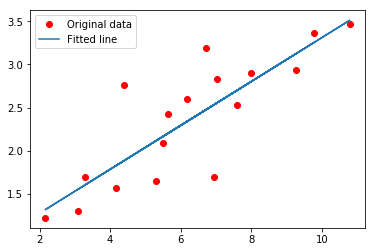

In [45]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch + 1) % display_steps == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print(" Epoch: ", epoch+1, " Cost: ", c," W: ", sess.run(W), " b: ", sess.run(b))
    print("Optimization Finished!")
    
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print(" Training Cost: ",training_cost, " W: ", sess.run(W), " b: ", sess.run(b))
    
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    

## Multi-feature Linear Regression

In [46]:
def feature_normalize(features):
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features

#### Hyperparameter

In [ ]:
learning_rate = 0.01
epochs = 1000
display_step = 50

#### Dataset { X: [200 x 3] , Y: [200 x 1] } i.e 3 features (column)

In [48]:
train_X = np.random.rand(200,3) * 10
train_Y = np.random.rand(200,1) * 100  
train_X = feature_normalize(train_X)

In [49]:
m, n = train_X.shape
X = tf.placeholder(tf.float32, [m, n])
Y = tf.placeholder(tf.float32, [m, 1])

W = tf.Variable(tf.zeros([n, 1], dtype=np.float32), name="weight")
b = tf.Variable(tf.zeros([1], dtype=np.float32), name="bias")

In [50]:
activation = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_sum(tf.square(activation - Y)) / (2*m)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [51]:
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)

    for step in range(epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        if step % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print ("Epoch:",step+1, "Cost: ",c, "W: ", sess.run(W), "b:", sess.run(b))

    print ("Training Done!")
    training_cost = sess.run(cost, feed_dict={X: np.asarray(train_X), Y: np.asarray(train_Y)})
    print("Training Cost: ", training_cost, "W: ", sess.run(W), "b: ", sess.run(b), '\n')


    predict_X = np.array([12, 13, 15], dtype=np.float32).reshape((1, 3))
    predict_X = predict_X / np.linalg.norm(predict_X)
    predict_Y = tf.add(tf.matmul(predict_X, W),b)
    print ("Predicted Output: ", sess.run(predict_Y))


Epoch: 1 Cost:  1544.0973 W:  [[ 0.00084892]
 [ 0.00679227]
 [-0.00376629]] b: [0.47872946]
Epoch: 51 Cost:  831.7934 W:  [[ 0.04192256]
 [ 0.3387207 ]
 [-0.18726902]] b: [19.19916]
Epoch: 101 Cost:  570.9086 W:  [[ 0.08041191]
 [ 0.65603167]
 [-0.3616499 ]] b: [30.525135]
Epoch: 151 Cost:  475.27194 W:  [[ 0.11646861]
 [ 0.9593734 ]
 [-0.5273563 ]] b: [37.37741]
Epoch: 201 Cost:  440.13422 W:  [[ 0.15023579]
 [ 1.2493653 ]
 [-0.6848141 ]] b: [41.523087]
Epoch: 251 Cost:  427.1527 W:  [[ 0.18184863]
 [ 1.526599  ]
 [-0.83442885]] b: [44.031246]
Epoch: 301 Cost:  422.29187 W:  [[ 0.21143463]
 [ 1.7916403 ]
 [-0.97658557]] b: [45.54869]
Epoch: 351 Cost:  420.41312 W:  [[ 0.23911406]
 [ 2.045029  ]
 [-1.1116512 ]] b: [46.466747]
Epoch: 401 Cost:  419.63467 W:  [[ 0.26500055]
 [ 2.287281  ]
 [-1.2399747 ]] b: [47.022182]
Epoch: 451 Cost:  419.26715 W:  [[ 0.2892012]
 [ 2.518889 ]
 [-1.3618872]] b: [47.358234]
Epoch: 501 Cost:  419.05725 W:  [[ 0.311817 ]
 [ 2.7403245]
 [-1.4777045]] b: [47